# Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Load dataset

In [71]:
df = pd.read_csv('mushrooms.csv')


# Fixing the names of columns for better Visualisation

In [72]:
cap_shape_map = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
cap_surface_map = {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
cap_color_map = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 
                'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
bruises_map = {'t': 'bruises', 'f': 'no'}
odor_map = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul',
            'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
gill_attachment_map = {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
gill_spacing_map = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size_map = {'b': 'broad', 'n': 'narrow'}
gill_color_map = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 
                  'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 
                  'w': 'white', 'y': 'yellow'}
stalk_shape_map = {'e': 'enlarging', 't': 'tapering'}
stalk_root_map = {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 
                  'r': 'rooted', '?': 'missing'}
stalk_surface_map = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_color_map = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange',
                  'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
veil_type_map = {'p': 'partial', 'u': 'universal'}
veil_color_map = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
ring_number_map = {'n': 'none', 'o': 'one', 't': 'two'}
ring_type_map = {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 
                'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
spore_print_color_map = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 
                        'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
population_map = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 
                  'v': 'several', 'y': 'solitary'}
habitat_map = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 
              'u': 'urban', 'w': 'waste', 'd': 'woods'}
class_map = {'e': 'edible', 'p': 'poisonous'}

df['cap-shape'] = df['cap-shape'].map(cap_shape_map)
df['cap-surface'] = df['cap-surface'].map(cap_surface_map)
df['cap-color'] = df['cap-color'].map(cap_color_map)
df['bruises'] = df['bruises'].map(bruises_map)
df['odor'] = df['odor'].map(odor_map)
df['gill-attachment'] = df['gill-attachment'].map(gill_attachment_map)
df['gill-spacing'] = df['gill-spacing'].map(gill_spacing_map)
df['gill-size'] = df['gill-size'].map(gill_size_map)
df['gill-color'] = df['gill-color'].map(gill_color_map)
df['stalk-shape'] = df['stalk-shape'].map(stalk_shape_map)
df['stalk-root'] = df['stalk-root'].map(stalk_root_map)
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map(stalk_surface_map)
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map(stalk_surface_map)
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map(stalk_color_map)
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map(stalk_color_map)
df['veil-type'] = df['veil-type'].map(veil_type_map)
df['veil-color'] = df['veil-color'].map(veil_color_map)
df['ring-number'] = df['ring-number'].map(ring_number_map)
df['ring-type'] = df['ring-type'].map(ring_type_map)
df['spore-print-color'] = df['spore-print-color'].map(spore_print_color_map)
df['population'] = df['population'].map(population_map)
df['habitat'] = df['habitat'].map(habitat_map)
df['class'] = df['class'].map(class_map)

df.to_csv('mushrooms_full_names.csv', index=False)


In [73]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nName of the columns:")
print(df.columns)

Dataset has 8124 rows and 23 columns.

Name of the columns:
Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


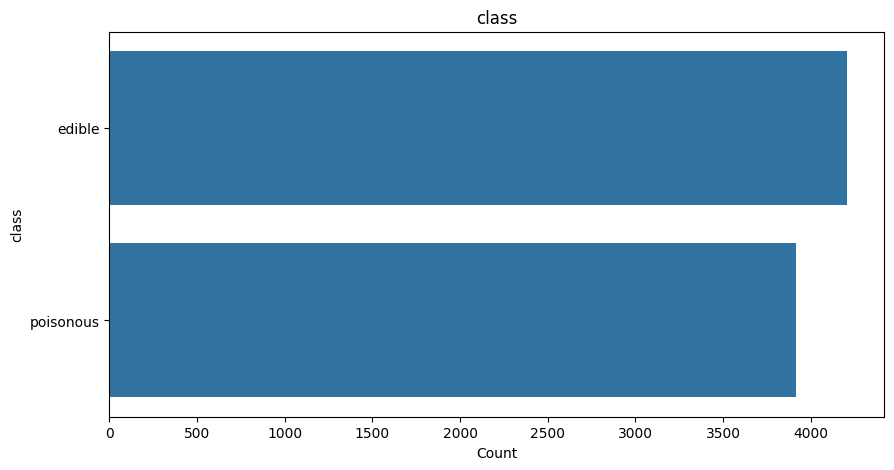

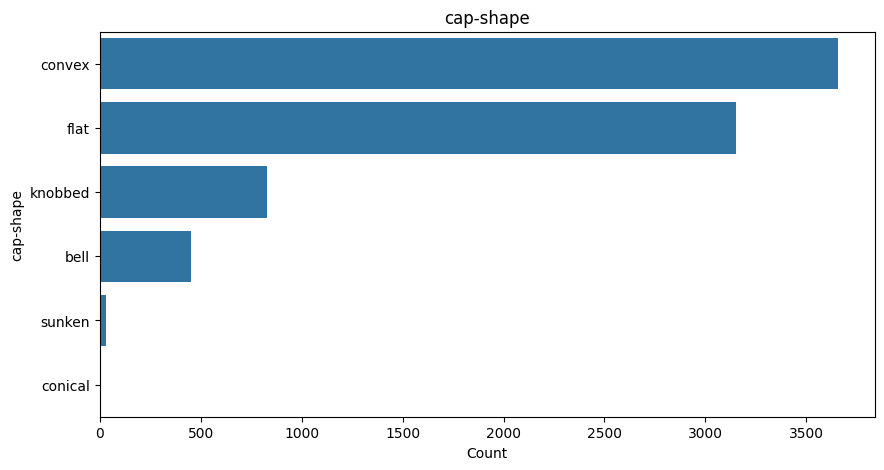

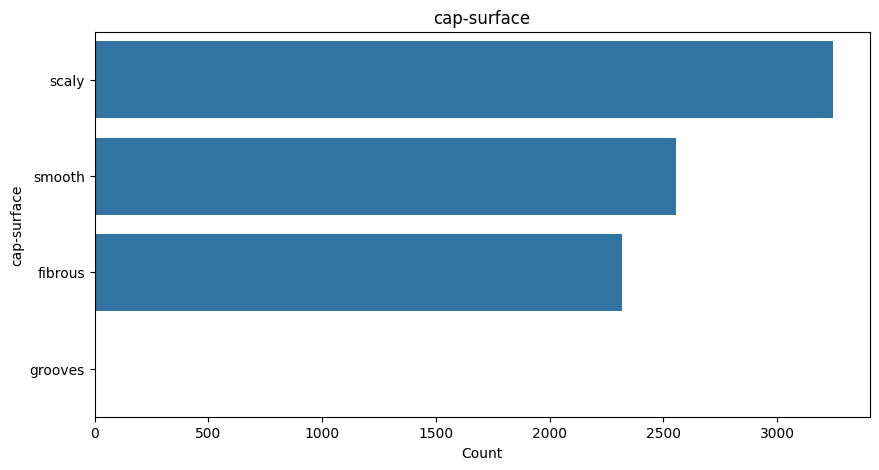

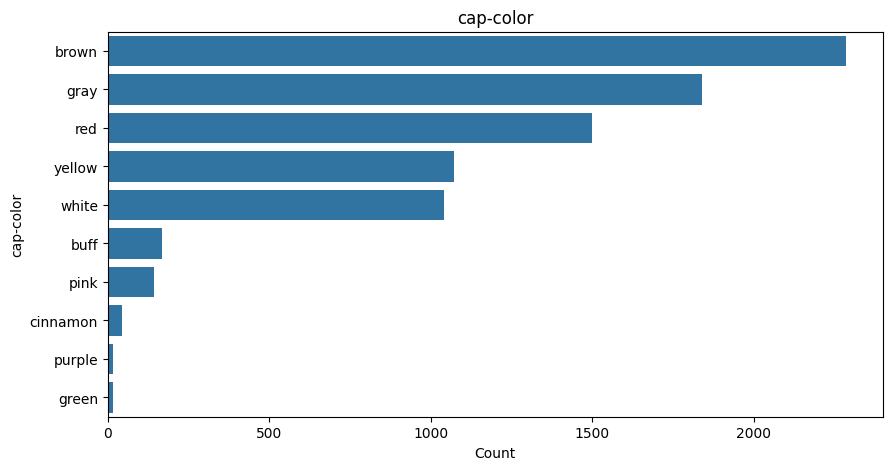

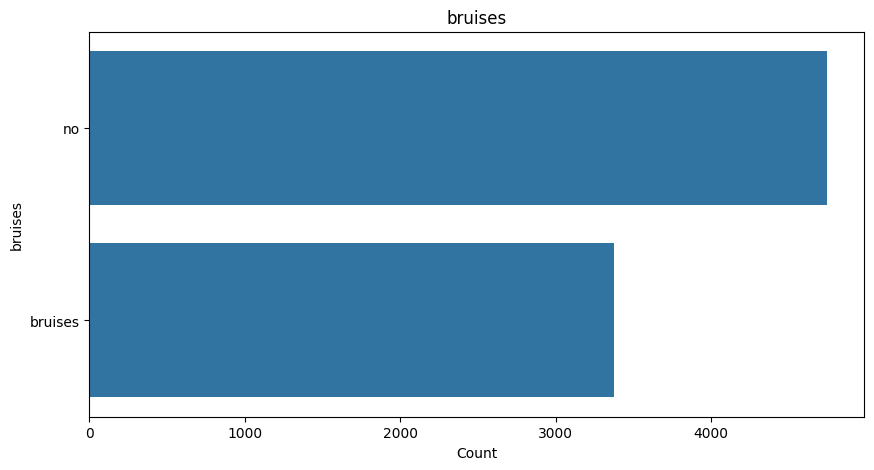

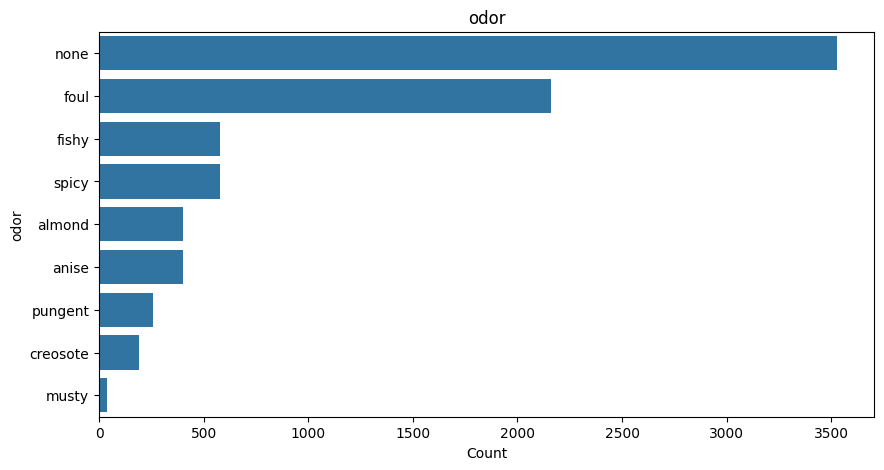

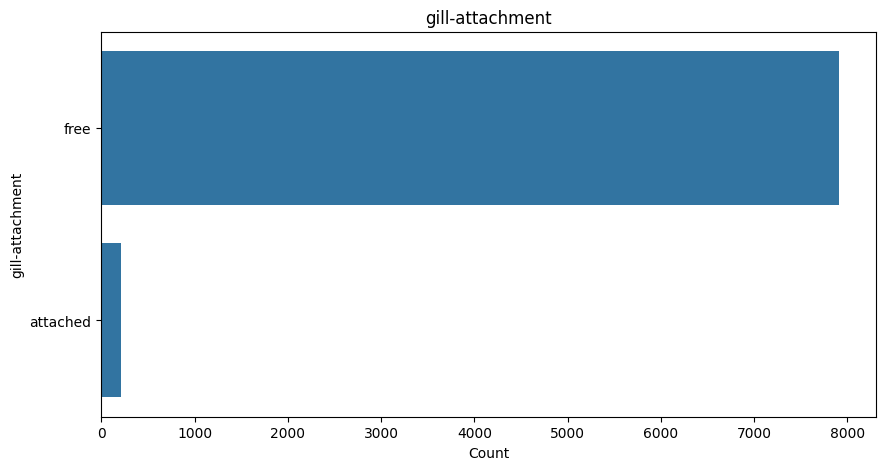

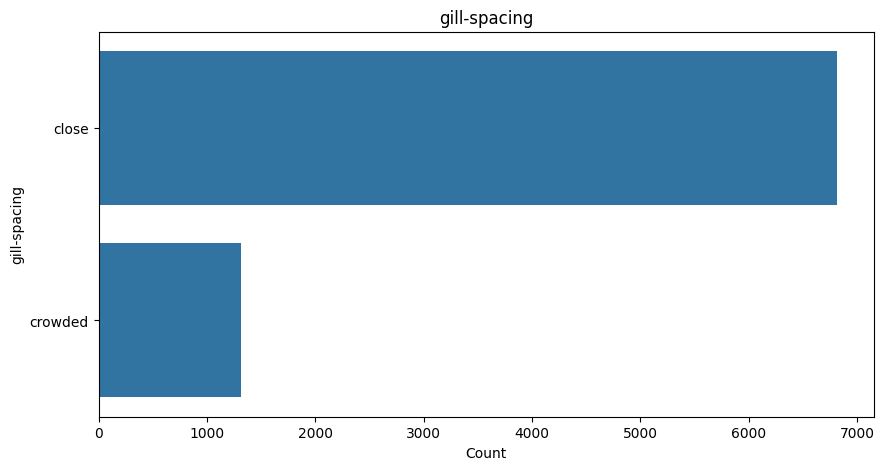

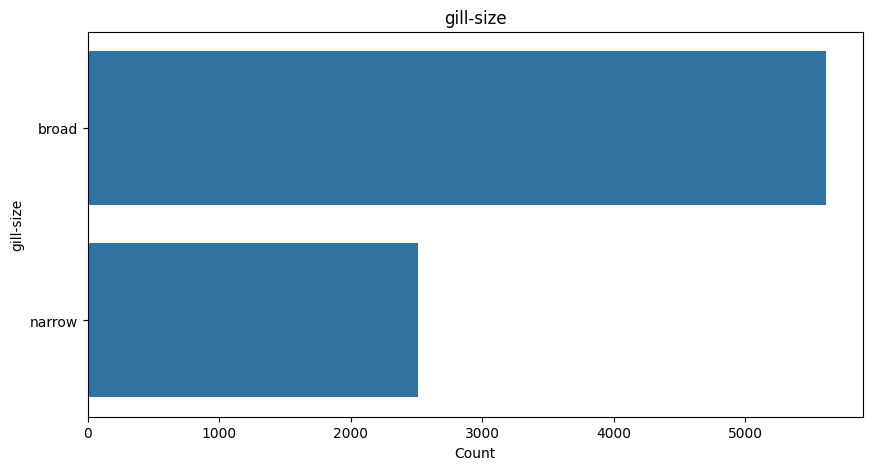

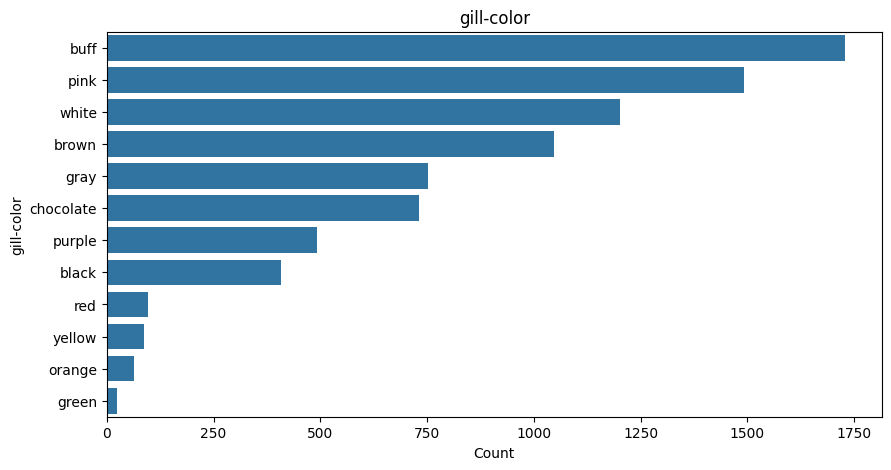

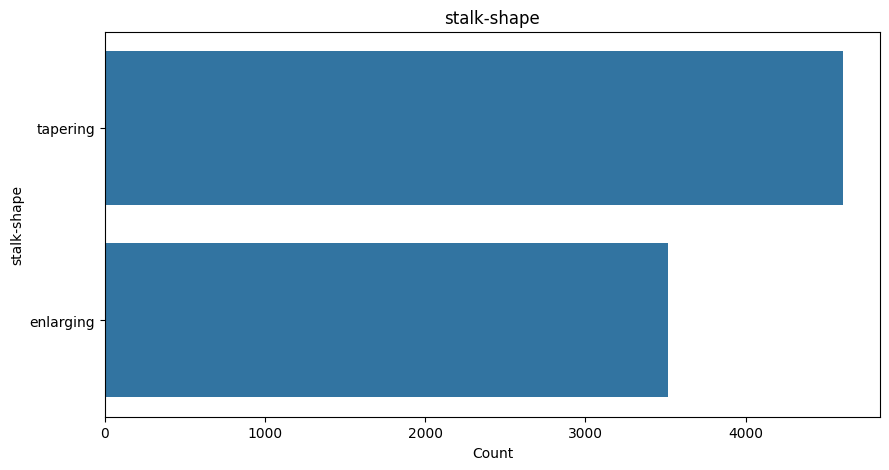

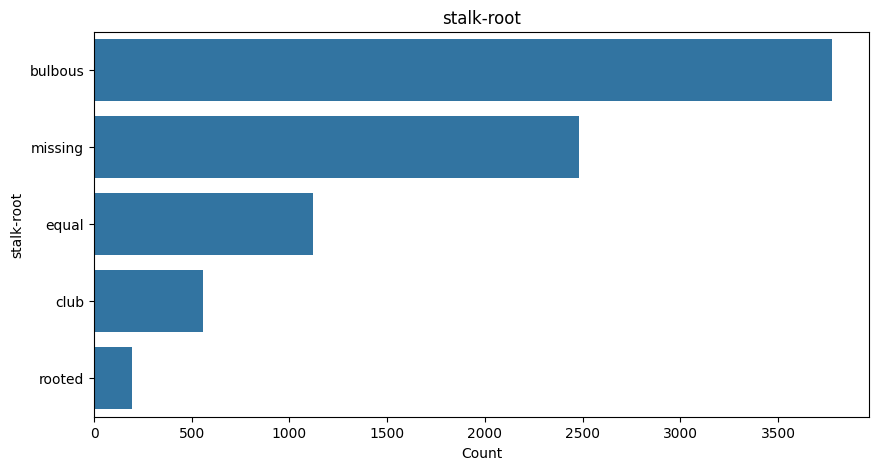

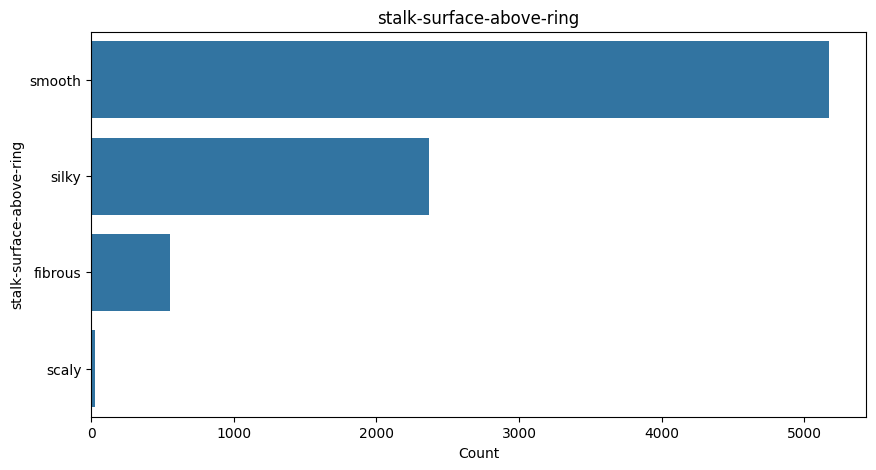

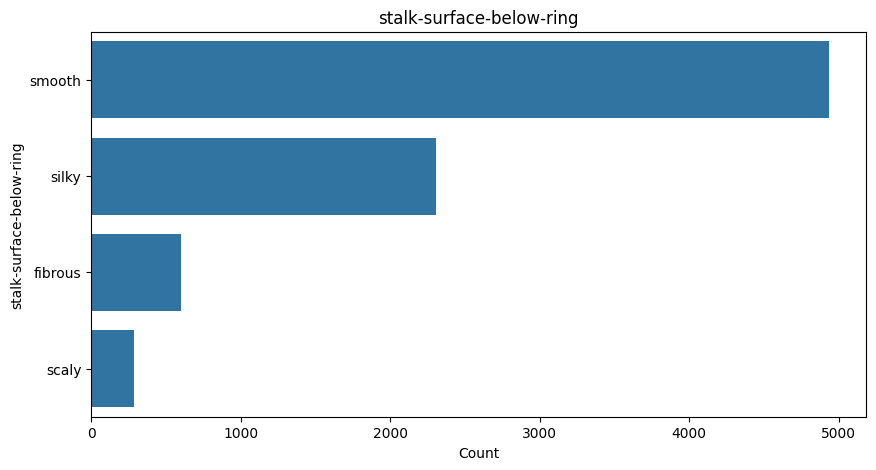

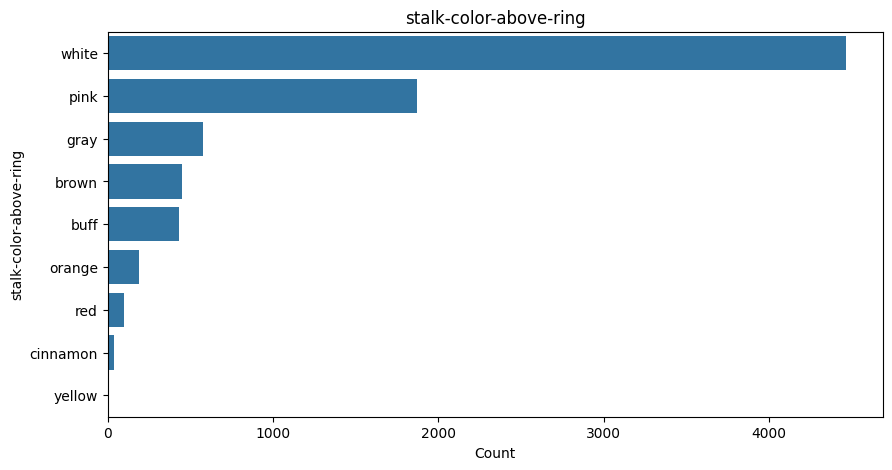

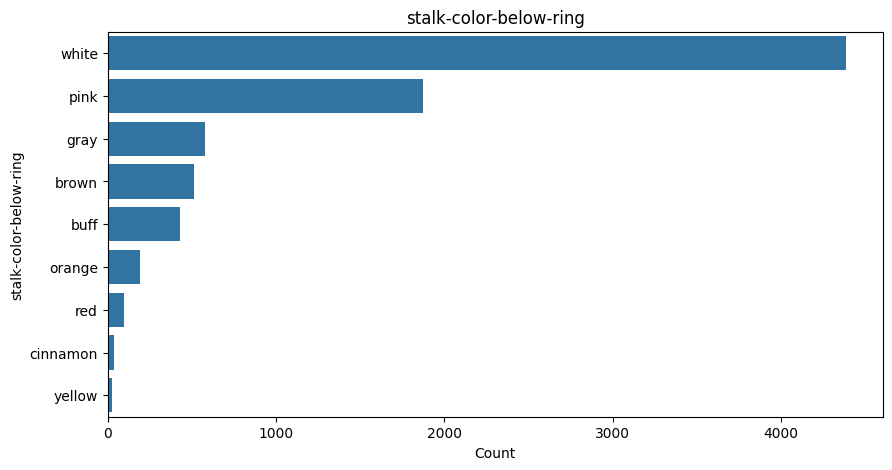

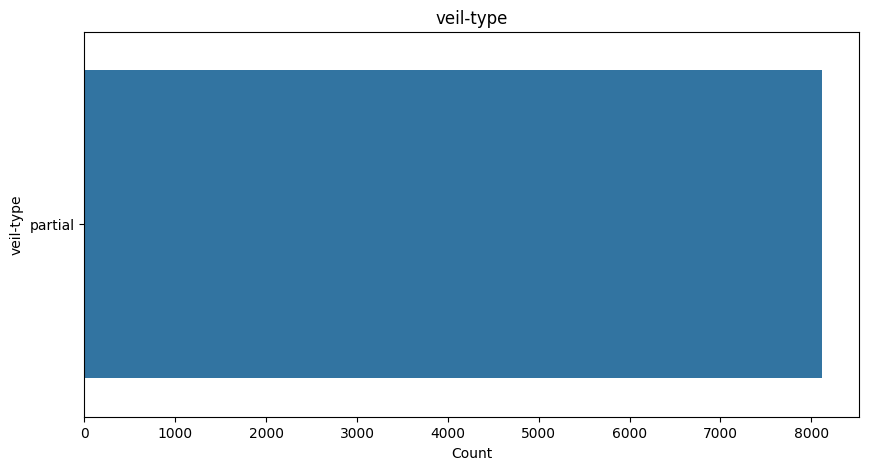

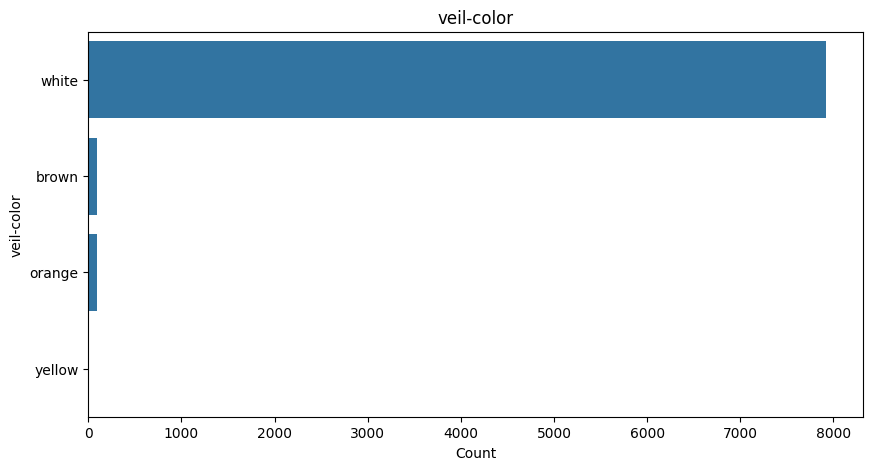

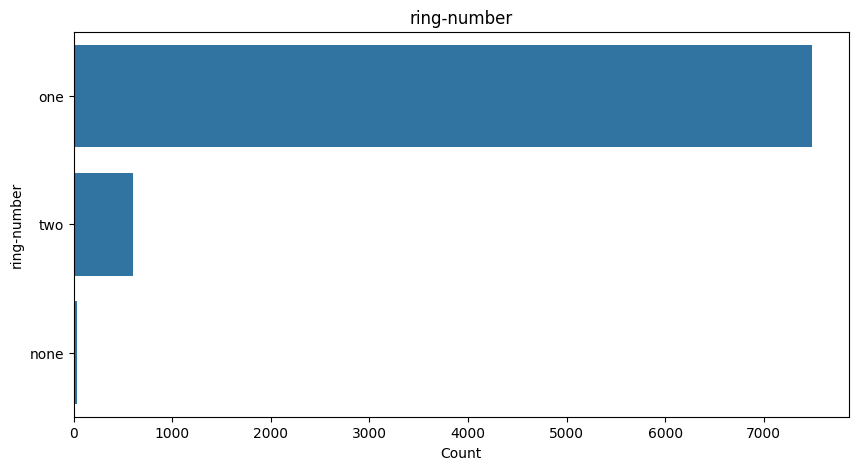

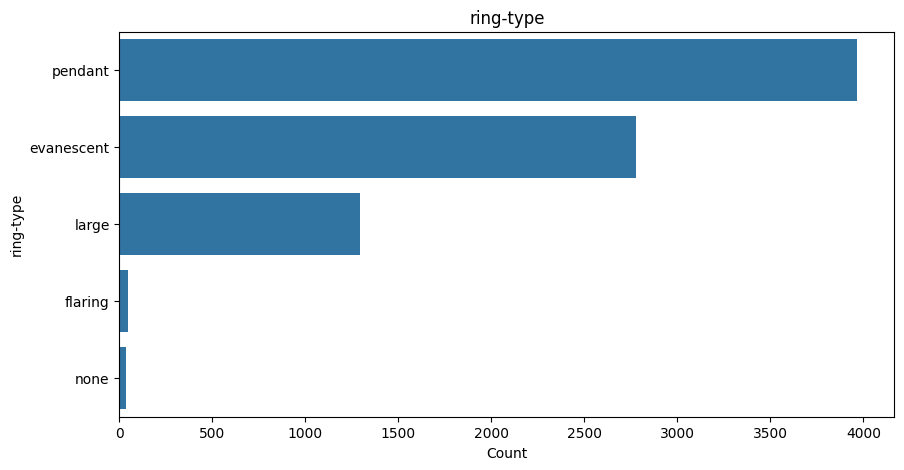

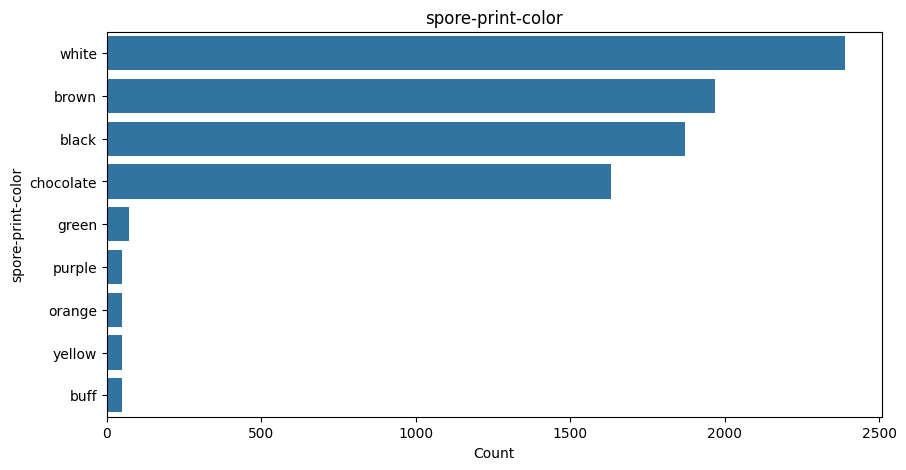

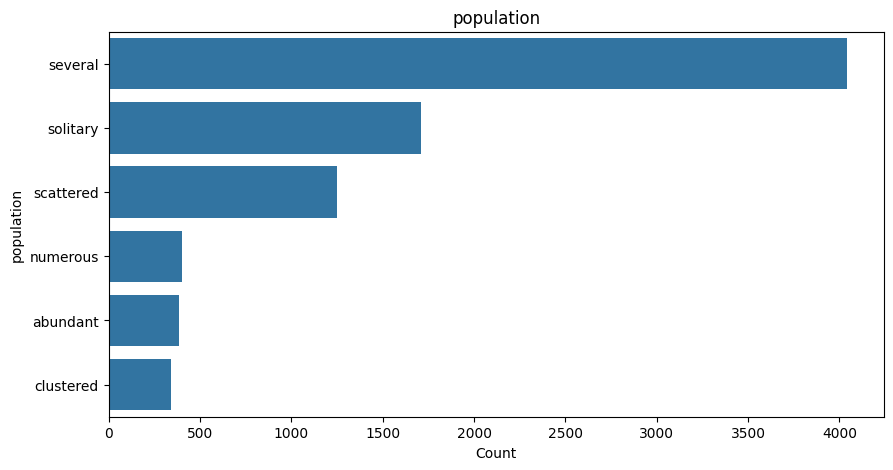

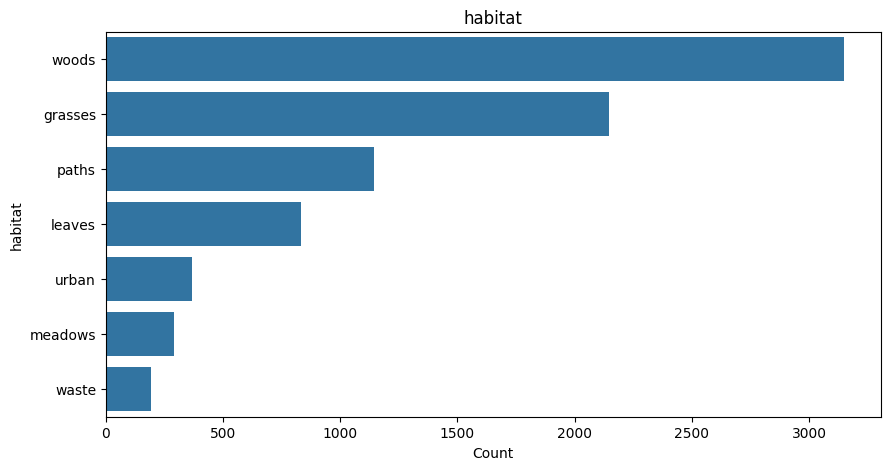

In [74]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order = df[col].value_counts().index)
    plt.title(col)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

In [75]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.isnull().sum())

Dataset has 8124 rows and 23 columns.
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [76]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [82]:
# X = df.drop(columns=["class", "veil-type","odor"])
X = df.drop(columns=["class", "veil-type"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

# One-Hot Encoding All Columns


In [78]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Random Forest classifier


In [79]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_pred = clf.predict(X_test_encoded)


# Accuracy, Precision, Recall

In [65]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='edible') 
recall = recall_score(y_test, y_pred, pos_label='edible')


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [66]:
feature_names = encoder.get_feature_names_out(X_train.columns)
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))


Top 10 Important Features:
                            feature  importance
28                        odor_none    0.125152
26                        odor_foul    0.085245
35                  gill-size_broad    0.057763
36                 gill-size_narrow    0.050208
58   stalk-surface-above-ring_silky    0.046065
39                  gill-color_buff    0.043389
93                ring-type_pendant    0.036167
97      spore-print-color_chocolate    0.035152
107              population_several    0.029912
21                       bruises_no    0.029700


### Why the Model Gets 100% Accuracy

This dataset is very clean and many features, like **odor**, **gill size**, and **spore color**.
The model can easily pick up these patterns, so it gets everything right.  
